## Welcome to this Analysis Notebook!

This notebook focuses on the key findings and main insights from a broader Exploratory Data Analysis (EDA) that was conducted in a separate notebook (notebook_0). Here, we'll walk through the most important steps and visualizations, making sure to explain what's happening with each piece of data, even if you're not a coding expert!


## 1. Setup and Library Imports

This first section is like setting up our workbench. We bring in all the necessary tools (libraries) that will help us handle data, create charts, and work with dates and times. Think of `pandas` as our main spreadsheet tool, `matplotlib` and `seaborn` as our art supplies for drawing charts, and `numpy` for advanced number crunching.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

## 2. Load and Prepare Sentiment Data

Here, we're importing data that measures market sentiment (how people feel about the market). We'll load a file called `fear_greed_index.csv`.

- **`timestamp`**: This column contains numerical codes representing exact moments in time. We'll convert these codes into easy-to-read dates and times.
- **`classification`**: This column tells us the overall market sentiment for a given day (e.g., 'Fear', 'Greed', 'Neutral').

We then create a new, cleaner version of this data, keeping only the important `datetime` and `classification` columns.


In [15]:
# google collab
# sentiment_df = pd.read_csv("/content/drive/MyDrive/Ds_Bhanu/csv_files/fear_greed_index.csv")

# vscode
sentiment_df = pd.read_csv("csv_files/fear_greed_index.csv")



# Convert timestamp to datetime format
sentiment_df["datetime"] = pd.to_datetime(sentiment_df["timestamp"], unit="s")

# Select relevant columns for cleaned sentiment data and explicitly create a copy
sentiment_clean = sentiment_df[["datetime","classification"]].copy()

### Save Cleaned Sentiment Data (Optional)

This step is commented out, meaning it won't run automatically. It shows how you could save our newly cleaned sentiment data into a fresh file if you wanted to use it elsewhere. This ensures you always have a clean version ready.


In [16]:
# Save the cleaned sentiment dataset back to your folder - drive
# sentiment_clean.to_csv("/content/drive/MyDrive/Ds_Bhanu/csv_files/sentiment_clean.csv", index=False)

# Save the cleaned sentiment dataset back to your folder - vscode
# sentiment_clean.to_csv("csv_files/sentiment_clean.csv", index=False)


## 3. Load and Prepare Trader Data

Now, we're bringing in the actual trading activity data from `historical_data.csv`. This file contains records of many trades. Like before, we need to tidy it up.

- **`Timestamp`**: Similar to the sentiment data, this column holds numerical time codes. We convert these into standard dates and times.
- **Columns to Drop**: The original data has several columns (`Account`, `Transaction Hash`, `Order ID`, `Trade ID`, `Timestamp`, `Timestamp IST`, `Fee`, `Coin`, `Direction `) that are either unique identifiers, redundant time information, or not directly needed for our analysis of sentiment's impact on trading. We remove them to keep our data focused and manageable.

The result is `trader_clean`, a streamlined dataset of trading activities.


In [17]:
# vscode
trader_df = pd.read_csv("csv_files/historical_data.csv")


# google collab
# trader_df = pd.read_csv("/content/drive/MyDrive/Ds_Bhanu/csv_files/historical_data.csv")
# Convert timestamp to datetime format
trader_df["datetime"] = pd.to_datetime(trader_df["Timestamp"], unit="ms")

# Define columns to drop that are not essential for this analysis
cols_to_drop = [
    "Account", "Transaction Hash", "Order ID", "Trade ID",
    "Timestamp", "Timestamp IST" , "Fee", "Coin" ,
    'Direction '
]

# Drop the specified columns and explicitly create a copy
trader_clean = trader_df.drop(columns=cols_to_drop, errors="ignore").copy()

### Save Cleaned Trader Data (Optional)

Just like with the sentiment data, this commented-out step demonstrates how you can save the cleaned trading data. This is useful for creating intermediate files or for sharing a tidy version of your data.


In [18]:
#  Save the cleaned trader dataset back to your folder - drive
# trader_clean.to_csv("/content/drive/MyDrive/Ds_Bhanu/csv_files/trader_clean.csv", index=False)

#  Save the cleaned trader dataset back to your folder - vscode
trader_clean.to_csv("csv_files/trader_clean.csv", index=False)

## 4. Combine (Merge) the Datasets

To understand how market sentiment influences trading, we need to bring our sentiment data and trading data together. We do this by:

1.  **Extracting the `date`**: From both our `sentiment_clean` and `trader_clean` dataframes, we create a simple `date` column (removing the time part). This allows us to match sentiment to trades that happened on the same day.
2.  **Merging**: We then combine the two datasets based on this shared `date` column. This means every trade in our `trader_clean` data will now have an associated `classification` (sentiment) for that specific day.

The final combined dataset is called `merged_df`.


In [19]:
# Extract the date part for merging
sentiment_clean.loc[:, "date"] = pd.to_datetime(sentiment_clean["datetime"]).dt.date
trader_clean.loc[:, "date"] = pd.to_datetime(trader_clean["datetime"]).dt.date

# Merge trader data with sentiment data on the common 'date' column
merged_df = pd.merge(
    trader_clean,
    sentiment_clean[["date", "classification"]],
    on="date",
    how="left"
)

### Save Merged Data (Optional)

This commented-out cell provides the option to save the `merged_df` into a new CSV file. This is a good practice after a significant data preparation step, ensuring you can easily access the combined dataset without re-running all previous steps.


In [20]:
#  Save the merged dataset back to your folder - drive
# merged_df.to_csv("/content/drive/MyDrive/Ds_Bhanu/csv_files/merged.csv", index=False)

#  Save the merged dataset back to your folder - vscode
# merged_df.to_csv("csv_files/merged.csv", index=False)

## 5. Exploratory Data Analysis & Visualization

Now that our data is combined, we can start exploring it visually to find interesting patterns and relationships. Each chart below will help us understand different aspects of trading behavior under varying market sentiments.

### 5.1 Average Closed PnL by Sentiment

This bar chart shows the average 'Closed PnL' (Profit and Loss) for trades, grouped by the market `classification` (sentiment).

- **`classification`**: Represents the market sentiment (e.g., Greed, Fear, Neutral).
- **`Closed PnL`**: This column indicates how much profit or loss a trade generated after it was closed. A positive value means profit, a negative value means loss.

We want to see if certain sentiments are linked to higher average profits or losses.


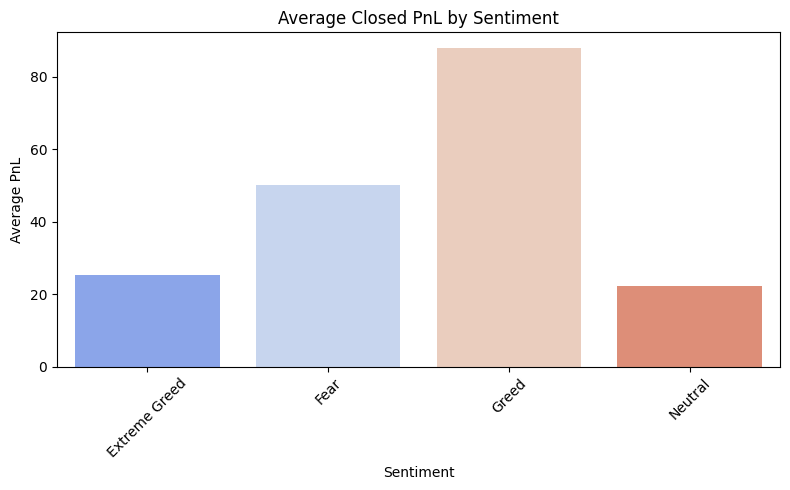

In [21]:
# Calculate average 'Closed PnL' grouped by 'classification'
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().reset_index()

plt.figure(figsize=(8,5))
# Create a bar plot to visualize average PnL by sentiment
sns.barplot(data=avg_pnl, x="classification", y="Closed PnL", hue="classification", palette="coolwarm", legend=False)
plt.title("Average Closed PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/avg_pnl_by_sentiment.png", dpi=300)
plt.show()

### 5.2 Total Trade Volume by Sentiment

This bar chart displays the total amount of money (in USD) that was traded during each market `classification` (sentiment).

- **`classification`**: The market sentiment (e.g., Greed, Fear, Neutral).
- **`Size USD`**: This column represents the total dollar value of a trade.

This visualization helps us understand if traders are more active (higher volume) when the market is, for example, 'Greedy' or 'Fearful'.


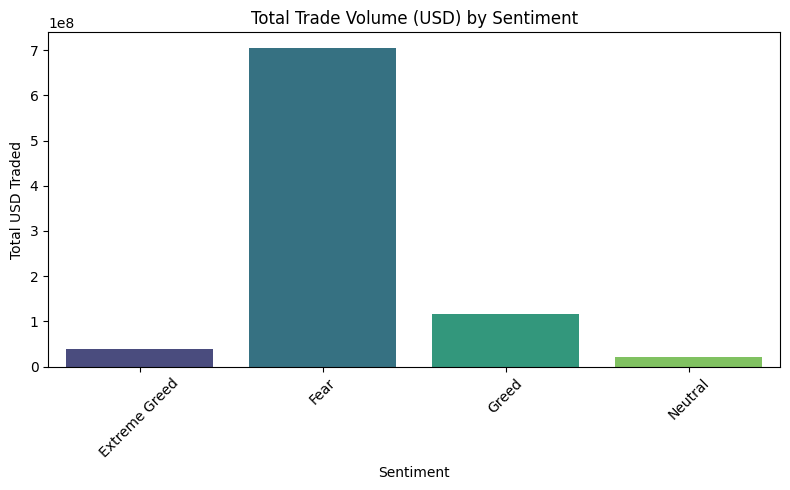

In [29]:
# Calculate total trade volume grouped by sentiment
total_volume = merged_df.groupby("classification")["Size USD"].sum().reset_index()

plt.figure(figsize=(8,5))
# Create a bar plot to visualize total trade volume by sentiment
sns.barplot(data=total_volume, x="classification", y="Size USD", hue="classification", palette="viridis", legend=False)
plt.title("Total Trade Volume (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total USD Traded")
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ Save the figure before showing
plt.savefig("outputs/total_volume_by_sentiment.png", dpi=300)

# ✅ Show the plot
plt.show()


### 5.3 Buy vs. Sell Ratio by Sentiment

These pie charts show the proportion of 'BUY' trades versus 'SELL' trades for each market `classification` (sentiment).

- **`classification`**: The market sentiment (e.g., Greed, Fear, Neutral).
- **`Side`**: This column tells us whether a trade was a 'BUY' (buying an asset) or a 'SELL' (selling an asset).

By looking at these charts, we can see if traders tend to buy more or sell more when the market is in a particular sentiment state.


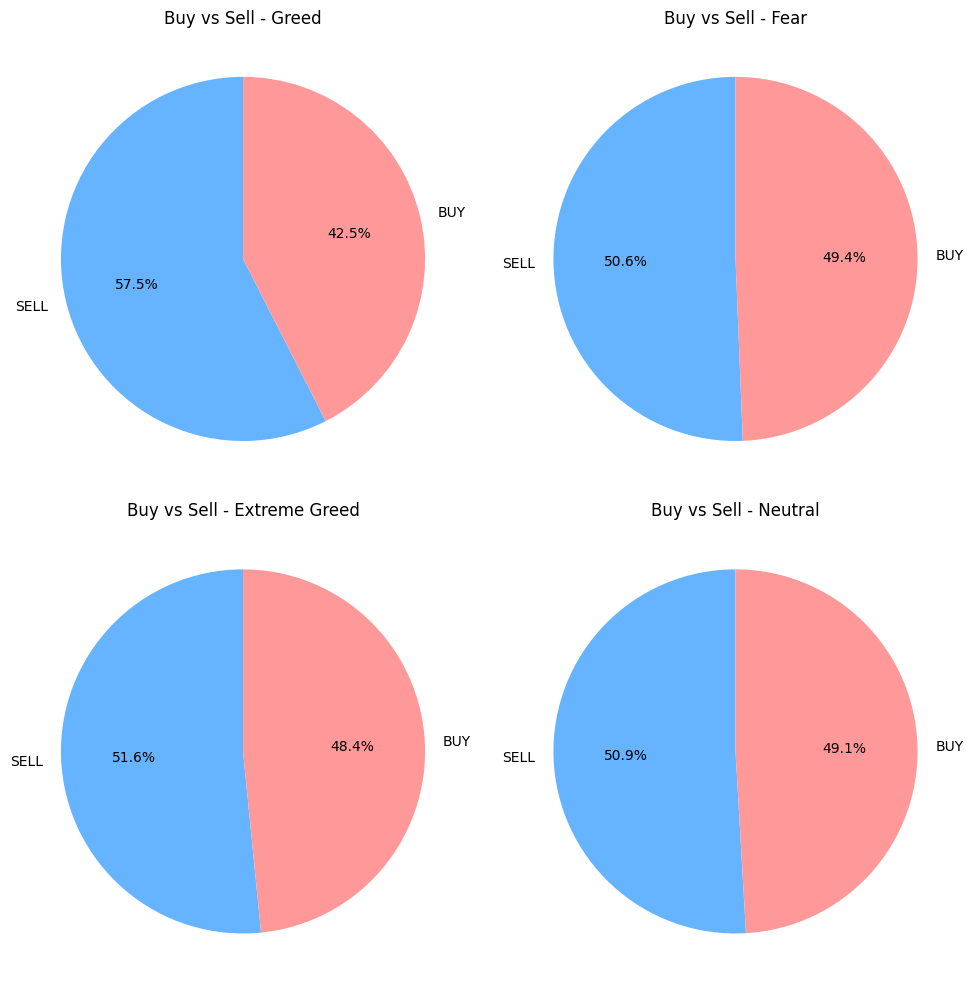

In [30]:
# Get unique sentiment categories
sentiments = merged_df["classification"].dropna().unique()

# Create subplots for pie charts
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

# Loop through each sentiment to create a pie chart for Buy vs Sell
for i, sentiment in enumerate(sentiments):
    subset = merged_df[merged_df["classification"] == sentiment]
    side_counts = subset["Side"].value_counts()

    axes[i].pie(
        side_counts,
        labels=side_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["#66b3ff", "#ff9999"]
    )
    axes[i].set_title(f"Buy vs Sell - {sentiment}")

plt.tight_layout()
plt.savefig("outputs/Buy_vs_sell_sentiment.png", dpi=300)

plt.show()

### 5.4 Percentage of Profitable Trades by Sentiment

This bar chart illustrates the percentage of trades that resulted in a profit (where `Closed PnL` was greater than zero), broken down by each market `classification` (sentiment).

- **`classification`**: The market sentiment.
- **`Closed PnL`**: Used to determine if a trade was profitable (positive PnL).

This helps us understand the success rate of trades under different market moods.


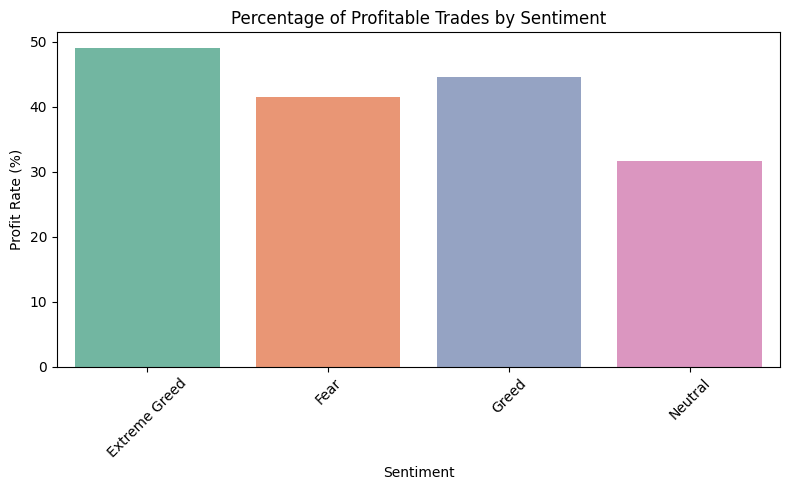

In [31]:
# Calculate the percentage of profitable trades for each sentiment category
profit_rate = merged_df.groupby("classification")["Closed PnL"].apply(lambda x: (x > 0).mean() * 100).reset_index(name="Profit Rate (%)")

plt.figure(figsize=(8,5))
# Create a bar plot to visualize profit rate by sentiment
sns.barplot(data=profit_rate, x="classification", y="Profit Rate (%)", hue="classification", palette="Set2", legend=False)
plt.title("Percentage of Profitable Trades by Sentiment")
plt.ylabel("Profit Rate (%)")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/%profitable_trade_by_sentiment.png", dpi=300)

plt.show()

### 5.5 Average Start Position by Sentiment

This bar chart displays the average 'Start Position' (which could represent the initial size or amount of an investment) for trades, categorized by market `classification` (sentiment).

- **`classification`**: The market sentiment.
- **`Start Position`**: This column likely indicates the size of the position initiated by a trade.

We can observe if traders tend to take larger or smaller initial positions depending on whether the market is, for example, 'Greedy' or 'Fearful'.


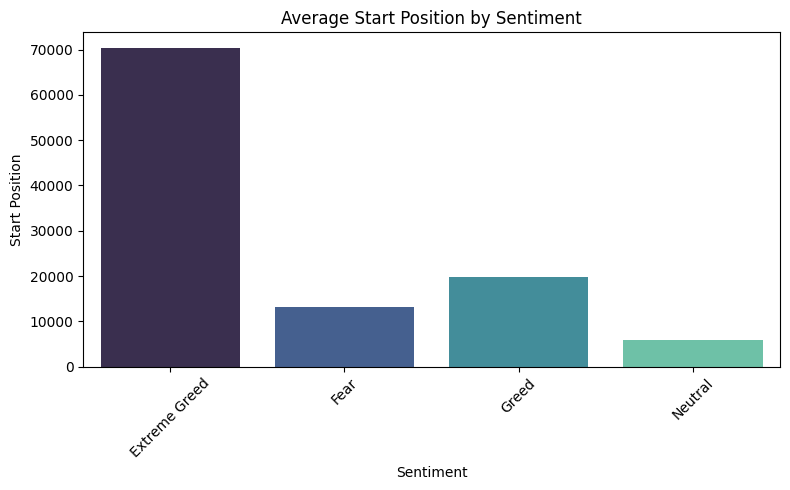

In [ ]:
# Calculate average 'Start Position' grouped by 'classification'
avg_start_pos = merged_df.groupby("classification")["Start Position"].mean().reset_index()

plt.figure(figsize=(8,5))
# Create a bar plot to visualize average start position by sentiment
sns.barplot(data=avg_start_pos, x="classification", y="Start Position", hue="classification", palette="mako", legend=False)
plt.title("Average Start Position by Sentiment")
plt.ylabel("Start Position")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/avg_start_pos_by_sentiment.png", dpi=300)
plt.show()

### 5.6 Win vs. Loss Rate by Sentiment

This chart categorizes all trades into 'Win', 'Loss', or 'Break-even' based on their `Closed PnL`, and then shows the count of each outcome for every market `classification` (sentiment).

- **`classification`**: The market sentiment.
- **`Closed PnL`**: This column determines if a trade is a win (positive), loss (negative), or break-even (zero).
- **`Result`**: A new column we create to clearly label each trade's outcome.

This gives a clear picture of how often trades end up profitable, at a loss, or neutral during different market sentiments.


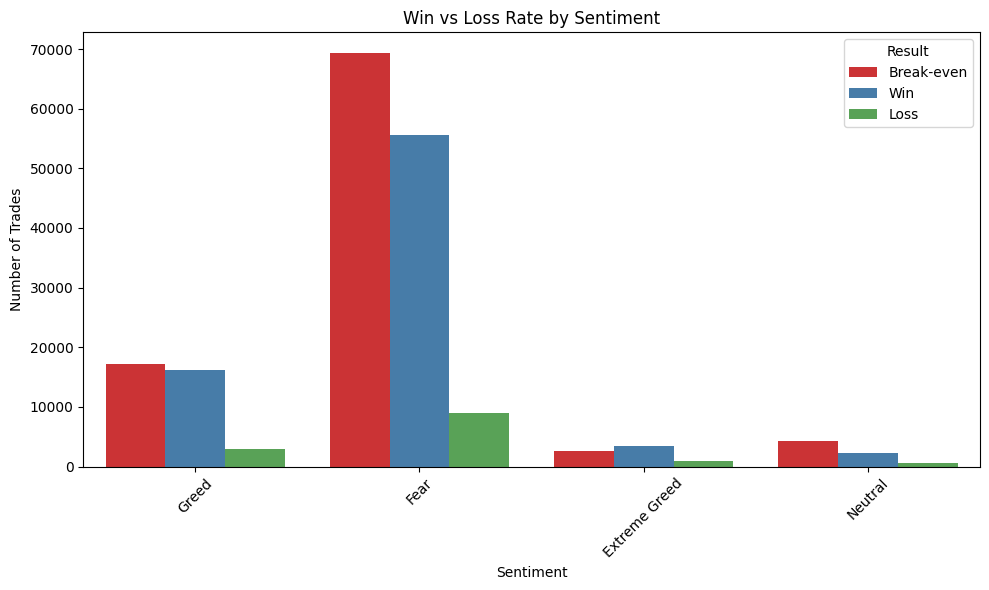

In [33]:
win_loss = merged_df.copy()
# Categorize trades into 'Win', 'Loss', or 'Break-even' based on 'Closed PnL'
win_loss["Result"] = win_loss["Closed PnL"].apply(lambda x: "Win" if x > 0 else ("Loss" if x < 0 else "Break-even"))

plt.figure(figsize=(10,6))
# Create a count plot to visualize win/loss rates by sentiment
sns.countplot(data=win_loss, x="classification", hue="Result", palette="Set1")
plt.title("Win vs Loss Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/win_loss_rate_by_sentiment.png", dpi=300)

plt.show()

### 5.7 Buy vs. Sell Count by Sentiment

Similar to the pie charts, this bar chart directly compares the total number of 'BUY' trades versus 'SELL' trades for each market `classification` (sentiment).

- **`classification`**: The market sentiment.
- **`Side`**: This column indicates if a trade was a 'BUY' or a 'SELL'.

This helps confirm any patterns seen in the pie charts and gives an absolute count of trading directions for each sentiment.


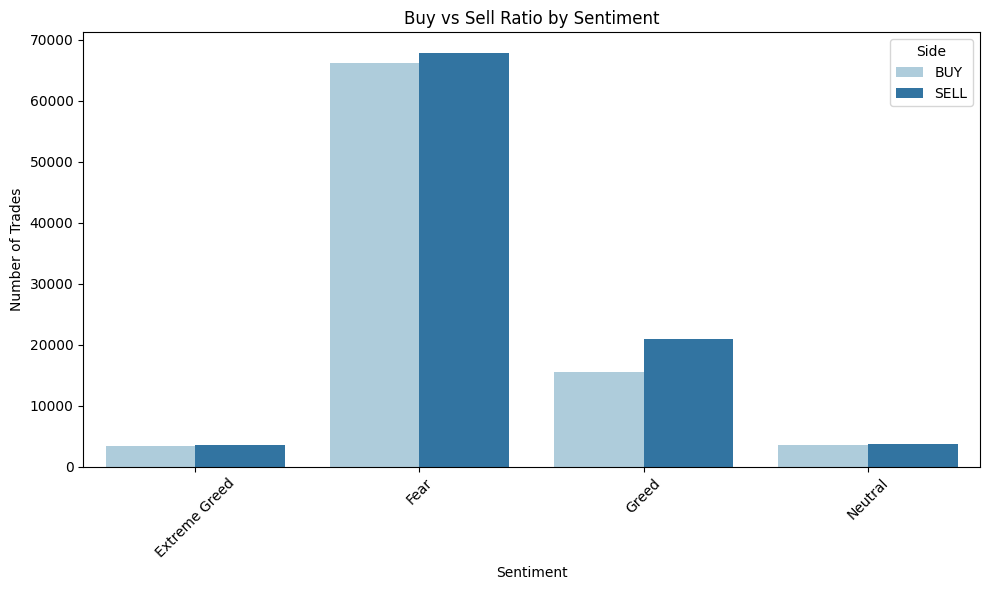

In [34]:
# Group by 'classification' and 'Side' to count Buy/Sell trades
side_ratio = merged_df.groupby(["classification","Side"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
# Create a bar plot to visualize Buy vs Sell count by sentiment
sns.barplot(data=side_ratio, x="classification", y="count", hue="Side", palette="Paired")
plt.title("Buy vs Sell Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("outputs/buy_sell_ratio_by_sentiment.png", dpi=300)

plt.show()

### 5.8 Trade Size vs. Closed PnL by Sentiment

This scatter plot helps us explore the relationship between the `Size USD` (how large a trade was in dollars) and its `Closed PnL` (profit or loss), with different market `classification` (sentiment) highlighted by color.

- **`Size USD`**: The dollar value of the trade.
- **`Closed PnL`**: The profit or loss from the trade.
- **`classification`**: The market sentiment, used to color-code the points.

We can look for trends, such as whether larger trades tend to be more profitable or lead to bigger losses under specific market sentiments.


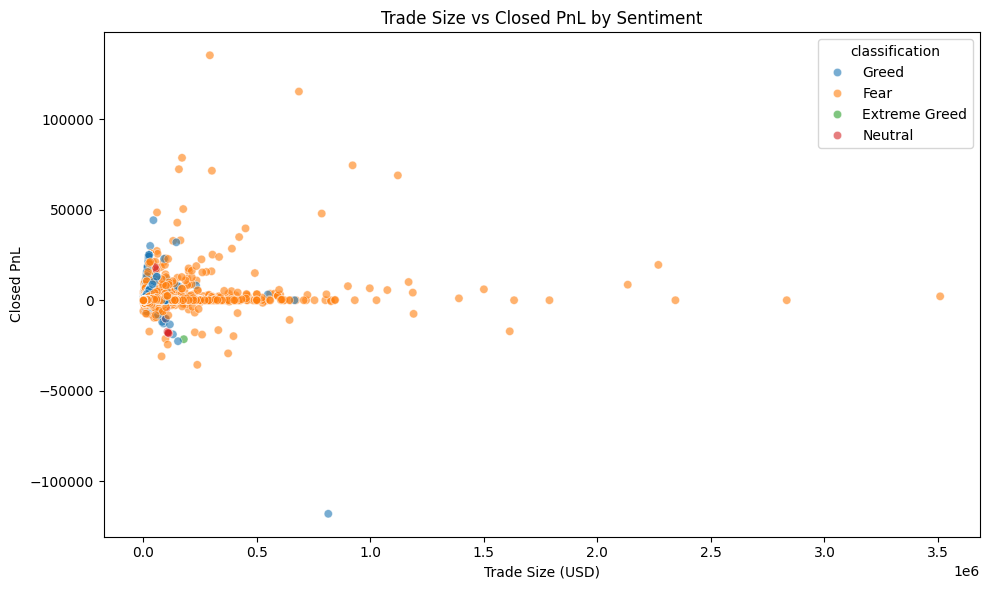

In [35]:
plt.figure(figsize=(10,6))
# Create a scatter plot to examine trade size vs. PnL, colored by sentiment
sns.scatterplot(data=merged_df, x="Size USD", y="Closed PnL", hue="classification", alpha=0.6)
plt.title("Trade Size vs Closed PnL by Sentiment")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.tight_layout()

plt.savefig("outputs/trade_size_vs_closed_pnl_by_sentiment.png", dpi=300)

plt.show()